# US Medical Insurance Costs Analysis

This notebook explores a dataset containing medical insurance costs in the United States. We will:
- Import and explore the data
- Perform exploratory data analysis (EDA)
- Visualize key relationships
- Build and evaluate regression models (Linear Regression and Random Forest) to predict insurance charges

---

## 1. Import the Required Libraries

In [55]:
import pandas as pd   # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualization

# Ensure plots display within the notebook
%matplotlib inline

# Set a visually appealing style for plots
plt.style.use('ggplot')

# Increase the figure size for better readability
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 2. Load and Explore the Dataset

In [39]:
# Load the dataset
df = pd.read_csv("insurance.csv")

# Display the first 5 rows
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Get General Information About the Dataset

In [40]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Dataset Overview

- **Total Rows**: 1338
- **Total Columns**: 7
- **Data Types**:
  - Numerical (int/float): `age`, `bmi`, `children`, `charges`
  - Categorical (object): `sex`, `smoker`, `region`

---

### Column Descriptions

- **age**: Age of primary beneficiary
- **sex**: Insurance contractor gender (female, male)
- **bmi**: Body mass index (kg/m^2), ideally in [18.5, 24.9]
- **children**: Number of children covered by health insurance / number of dependents
- **smoker**: Whether the person smokes (yes/no)
- **region**: Residential area in the US (northeast, southeast, southwest, northwest)
- **charges**: Individual medical costs billed by health insurance

## 3. Check for Missing Values

In [41]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No missing values are present, so we do not need to handle missing data.

## 4. Summary Statistics of Numerical Features

In [42]:
# Get summary statistics of numerical columns
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


**Key Observations**
- **Age**: The median is around 39, with a minimum of 18 and a maximum of 64.
- **BMI**: The average BMI is about 30.66. Values above 45 are considered quite high.
- **Children**: Most individuals have 0 to 2 children; a few have up to 5.
- **Charges**: The median cost is 9,382 dollars, but the maximum is over 63,000 dollars (indicative of very high-cost cases).

---

## 5. Analyze Data Distribution and Correlations

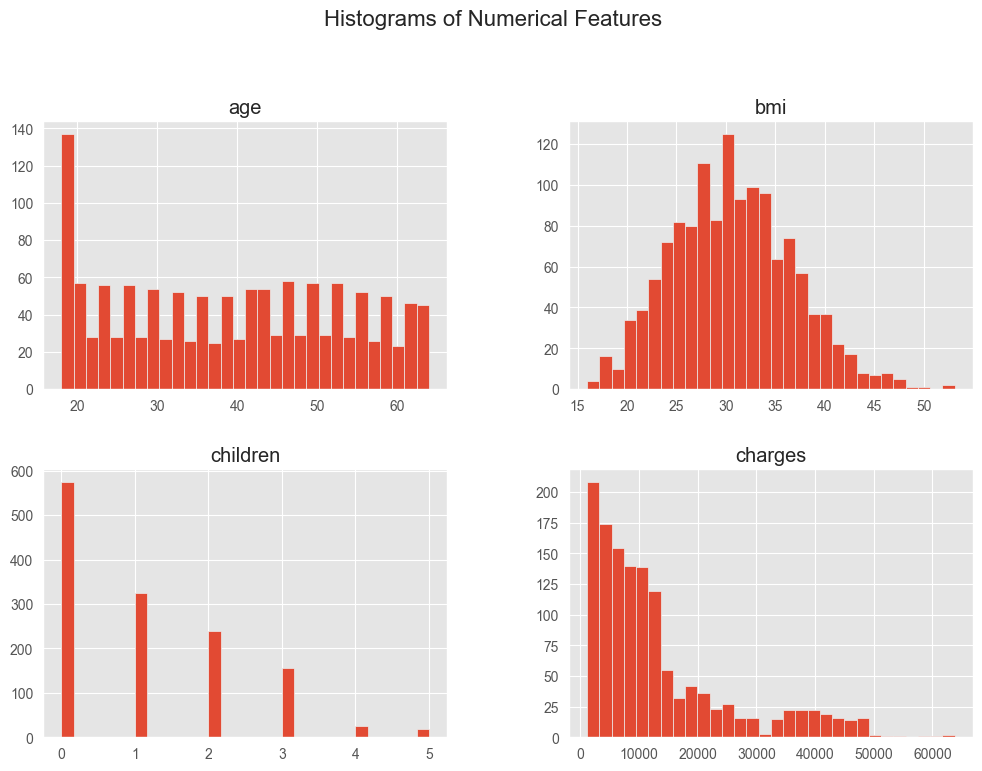

In [43]:
# Plot histograms for all numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02, fontsize=16)
plt.show()

**Histogram Analysis**
- **Age**: Fairly even distribution with a slight concentration of younger ages.
- **BMI**: Roughly normal with a peak near 30, but outliers above 45.
- **Children**: Most people have 0, 1, or 2 children; 4 or 5 is uncommon.
- **Charges**: Heavily right-skewed, indicating some individuals pay extremely high costs.


### Identify Outliers Using Boxplots

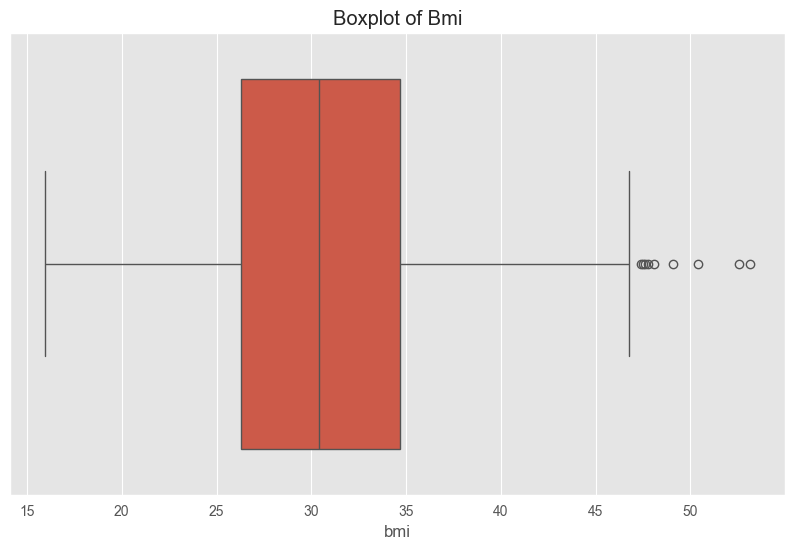

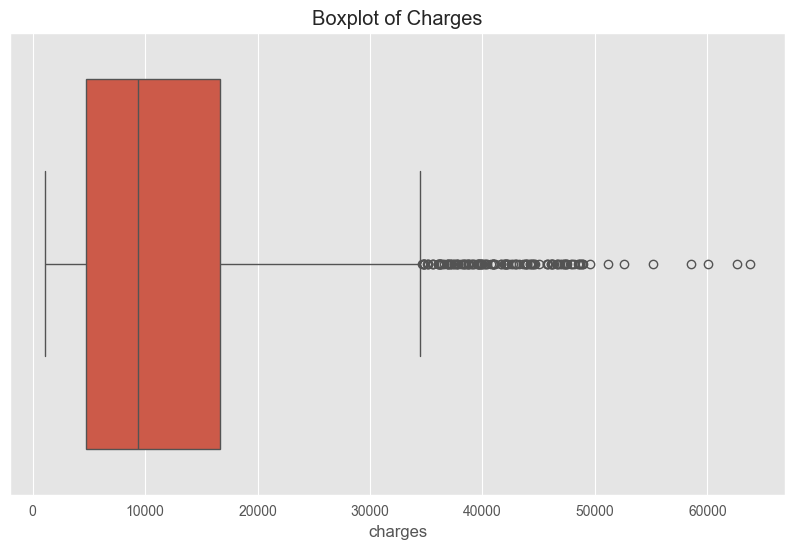

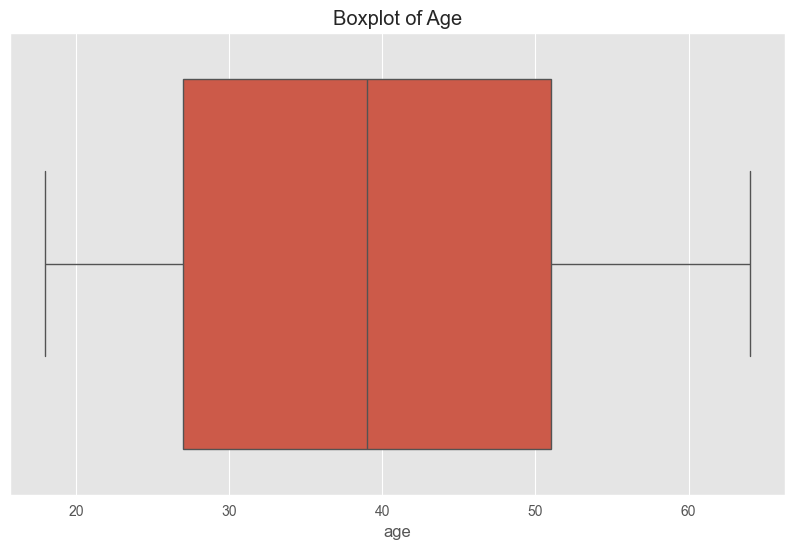

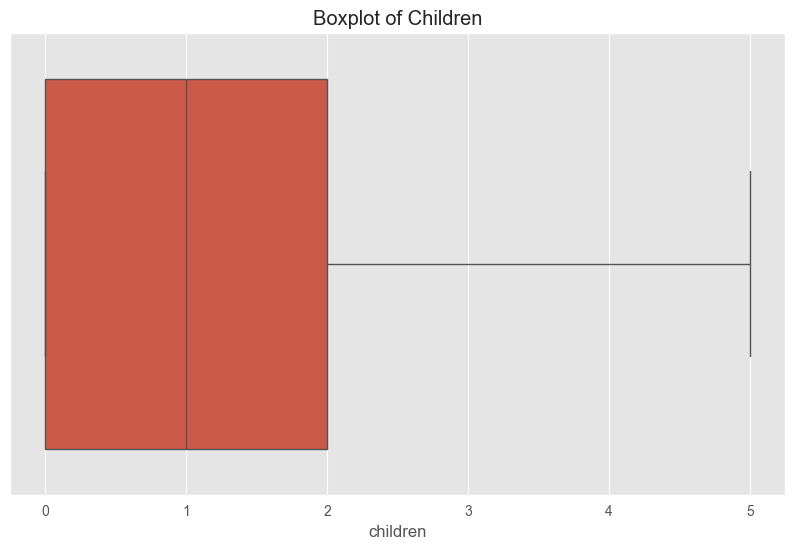

In [59]:
# Boxplot for selected numerical features
features_to_plot = ["bmi", "charges", "age", "children"]
for feature in features_to_plot:
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature.capitalize()}")
    plt.show()

**Boxplot Analysis**
- **BMI**: Values above ~45 are outliers.
- **Charges**: Many high-value outliers above \$30,000 (often associated with smokers or significant health issues).
- **Age**: No extreme outliers.
- **Children**: 4 or 5 children is less common but not extremely outlying.

### Attempt Correlation Analysis

In [45]:
# Attempting df.corr() on original data with categorical columns will raise a ValueError
# because 'sex', 'smoker', and 'region' are non-numeric.

The correlation function (`df.corr()`) only works with numeric data, so we need to encode categorical variables first.

## 6. Encode Categorical Variables

In [46]:
# Create a copy of the original DataFrame
df_encoded = df.copy()

# Binary encoding for 'sex' and 'smoker'
df_encoded["sex"] = df_encoded["sex"].map({"female": 0, "male": 1})
df_encoded["smoker"] = df_encoded["smoker"].map({"no": 0, "yes": 1})

# One-Hot Encoding for 'region'
df_encoded = pd.get_dummies(df_encoded, columns=["region"])

# Display the transformed data
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


### Correlation Matrix (After Encoding)

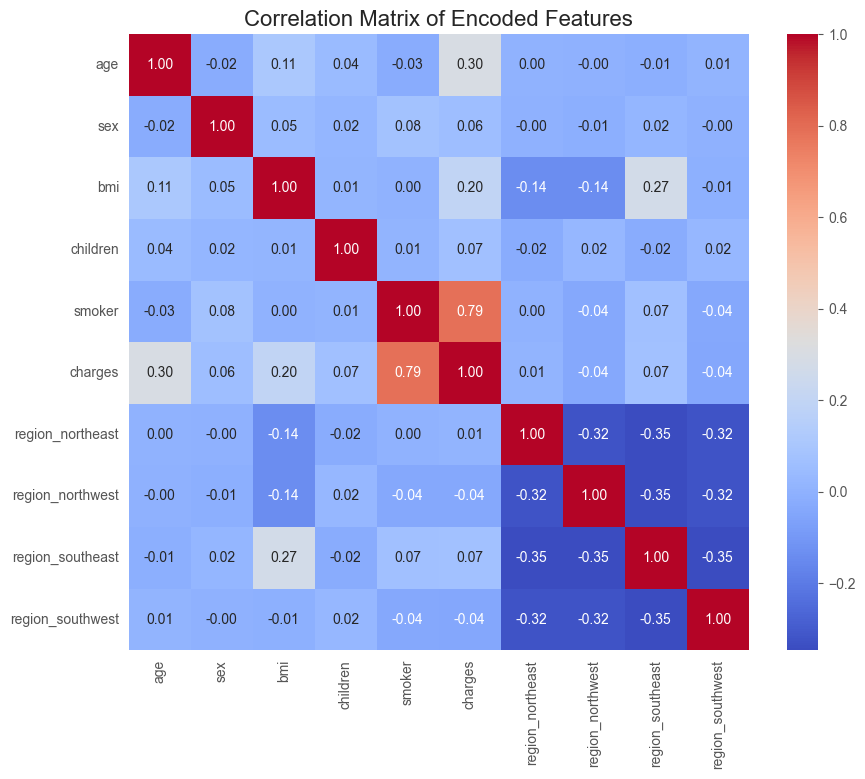

In [61]:
# Compute the correlation matrix on the encoded DataFrame
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Encoded Features", fontsize=16)
plt.show()

**Observations**
- `smoker` has a strong positive correlation with `charges`.
- `age` also shows a positive relationship with `charges`.
- `bmi` has a moderate positive correlation with `charges`.
- Other features have weaker correlations with `charges`.

### Pairwise Relationships

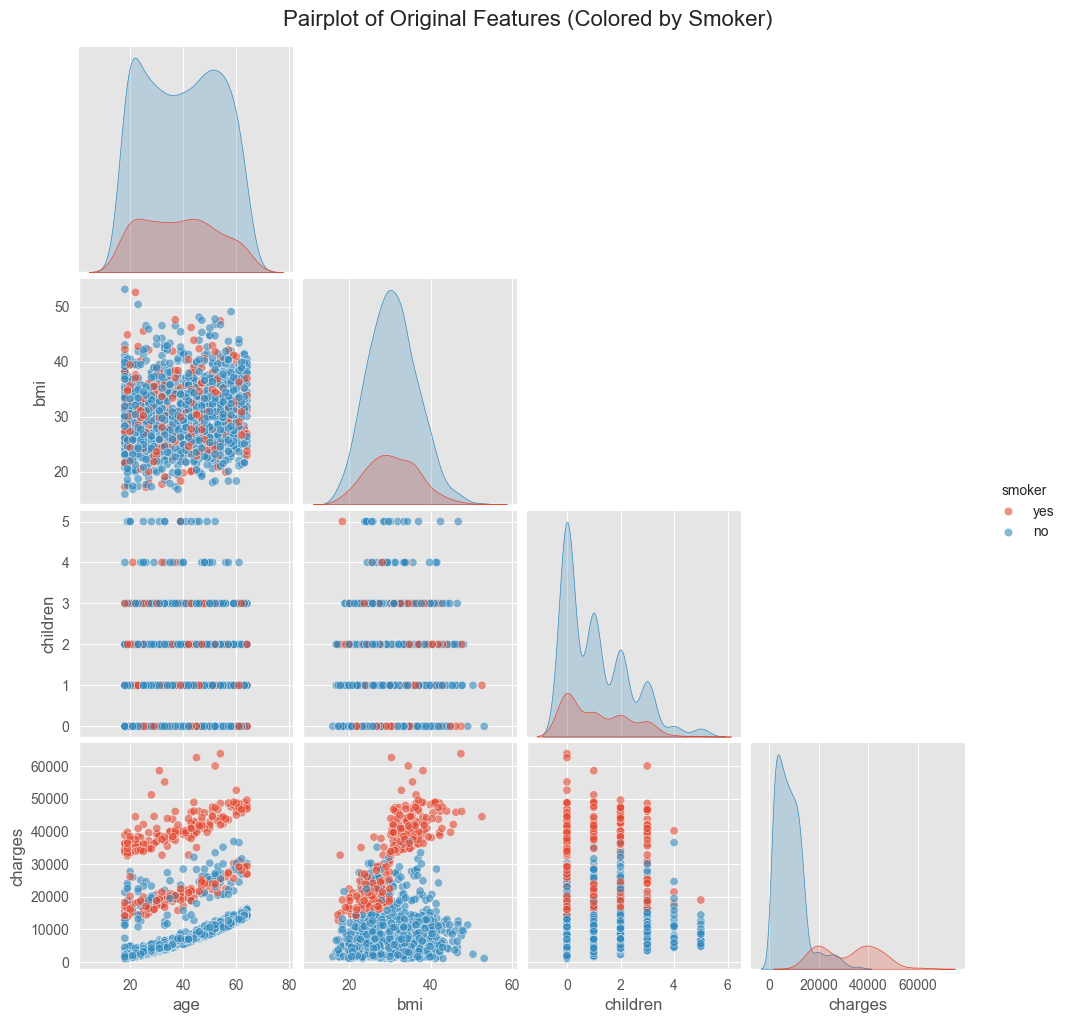

In [48]:
# Optional: Pairplot to visualize relationships (colored by smoker status)
sns.pairplot(df, hue="smoker", diag_kind="kde", corner=True, plot_kws={"alpha": 0.6})
plt.suptitle("Pairplot of Original Features (Colored by Smoker)", y=1.02, fontsize=16)
plt.show()

From the pairplot, smoking status is a significant factor in high insurance charges. BMI and age also contribute notably.

---

## 7. Additional Visual Analyses

### Charges for Smokers vs. Non-Smokers

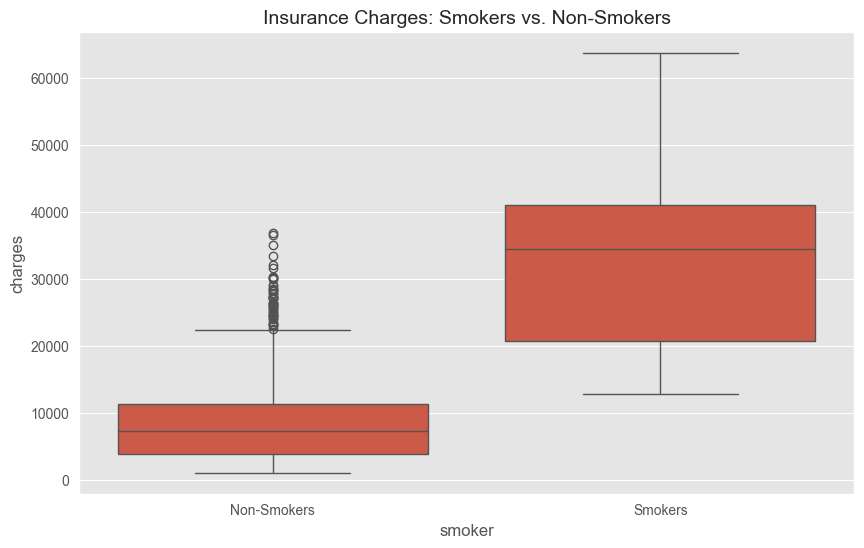

In [49]:
sns.boxplot(x="smoker", y="charges", data=df_encoded)
plt.title("Insurance Charges: Smokers vs. Non-Smokers", fontsize=14)
plt.xticks([0,1], ["Non-Smokers", "Smokers"])
plt.show()

Smoking dramatically increases insurance charges.

### Charges vs. Age

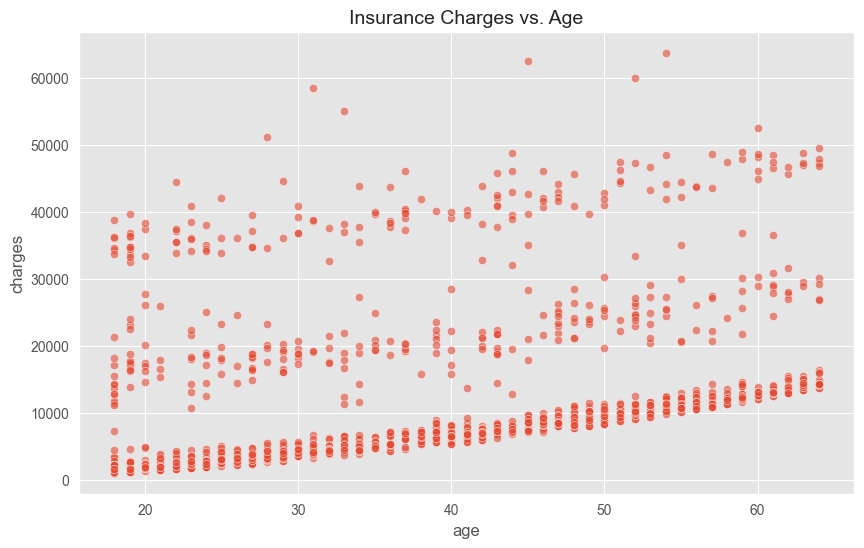

In [50]:
sns.scatterplot(x="age", y="charges", data=df_encoded, alpha=0.6)
plt.title("Insurance Charges vs. Age", fontsize=14)
plt.show()

Older individuals tend to have higher insurance charges, though there is considerable variance.

### Interaction Between BMI, Smoking, and Charges

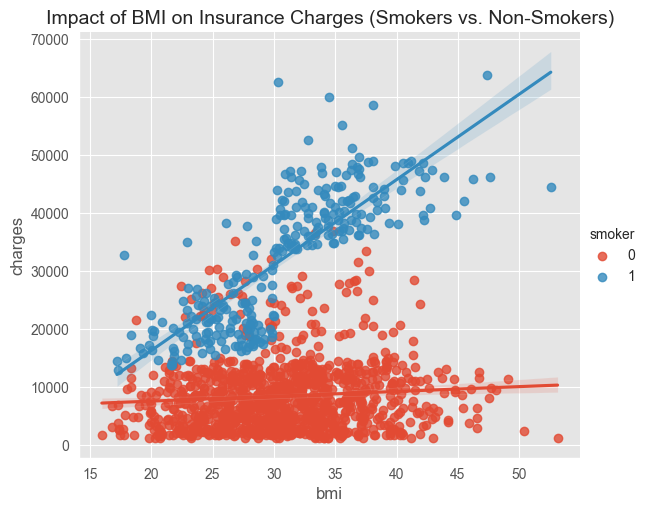

In [51]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df_encoded, aspect=1.2)
plt.title("Impact of BMI on Insurance Charges (Smokers vs. Non-Smokers)", fontsize=14)
plt.show()

For smokers, higher BMI correlates strongly with higher charges.

### Insurance Charges by Sex

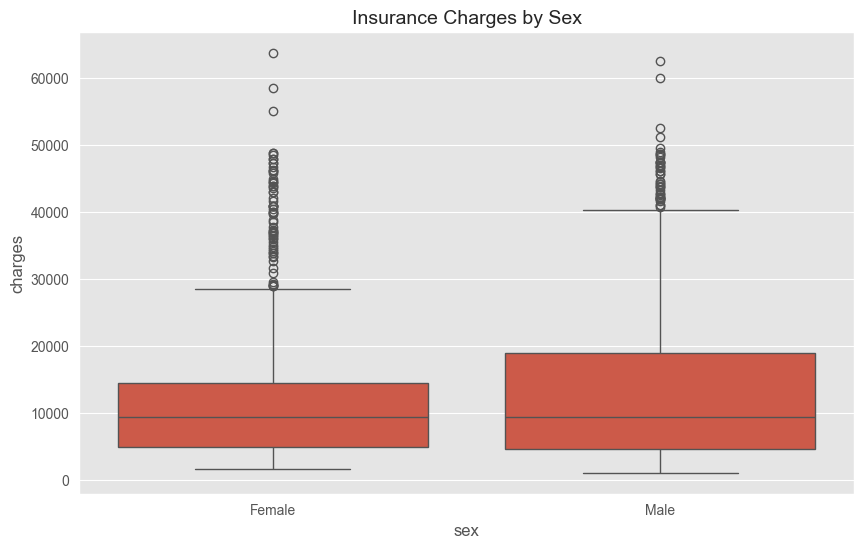

In [52]:
sns.boxplot(x="sex", y="charges", data=df_encoded)
plt.title("Insurance Charges by Sex", fontsize=14)
plt.xticks([0,1], ["Female", "Male"])
plt.show()

There is no substantial difference in charges between males and females, hence `sex` might not be a key predictor.

---

## 8. Feature Selection

Based on our analysis, we will focus on the following features:

- **Features to Keep**:
  1. `age`
  2. `bmi`
  3. `smoker`
  4. `charges` (target variable)

- **Features to Exclude**:
  - `sex` (no significant impact)
  - `children` (weak correlation)
  - `region` (minimal influence)


In [36]:
# Selecting relevant features
df_final = df_encoded[['age', 'bmi', 'smoker', 'charges']]

# Splitting into features (X) and target variable (y)
X = df_final.drop("charges", axis=1)
y = df_final["charges"]

# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data prepared successfully!")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Data prepared successfully!
Training set size: 1070 rows
Testing set size: 268 rows


## 9. Train a Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 4260.56
Mean Squared Error (MSE): 34512843.88
Root Mean Squared Error (RMSE): 5874.76
R-squared (R²): 0.78


- MAE (Mean Absolute Error) → Average absolute difference between predicted and actual charges.
- MSE (Mean Squared Error) → Penalizes large errors more than MAE.
- RMSE (Root Mean Squared Error) → Similar to MSE but in the same unit as charges, making it easier to interpret.
- R² (R-squared Score) → Shows how well the model explains the variance in charges (closer to 1 means better).

## Model Performance Analysis

### What the metrics tell us:

R² (0.78) → Good, but Not Perfect
    - The model explains 78% of the variance in insurance charges.
    - This is a strong result for a simple model but suggests there is still room for improvement.

MAE (4260.56) → High Error
    - On average, the predictions are off by $4,260.
    - This means some predictions could be significantly over or under the actual charges.

RMSE (5874.76) → Large Deviations
    - Since RMSE penalizes large errors more, it confirms that some predictions are quite far from actual values.
    - This suggests that Linear Regression might not be the best model for this dataset.

## How to Improve the Model

Since Linear Regression assumes a linear relationship, it may struggle with non-linear relationships and outliers.

Linear Regression had limitations in our dataset:
- Non-linearity – It assumes a linear relationship, but medical costs may have complex, non-linear dependencies.
- Outlier Sensitivity – Large MAE and RMSE indicate significant prediction errors, possibly due to outliers.

Due to these reasons, we can use Random Forest:
- Captures Non-Linear Relationships – Decision trees handle complex patterns better.
- Robust to Outliers – Aggregating multiple trees reduces sensitivity to extreme values.
- Feature Importance Analysis – Helps identify key variables affecting costs.
- Lower Error Rates – Typically outperforms Linear Regression in similar cases.

For further improvements, models like XGBoost or LightGBM could be explored.

## 10. Train a Random Forest Regressor (Non-Linear Model)

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")

Random Forest - MAE: 2755.48
Random Forest - MSE: 25667732.07
Random Forest - RMSE: 5066.33
Random Forest - R²: 0.83


---
# Conclusion

This notebook demonstrates the entire process of:
1. Data loading and initial exploration
2. Identifying and visualizing outliers
3. Encoding categorical features
4. Conducting correlation analysis
5. Selecting relevant features
6. Training and evaluating two models (Linear Regression and Random Forest)

**Key Takeaways**
- Smoking status, age, and BMI are strong predictors of medical insurance charges.
- A Random Forest model typically outperforms a simple Linear Regression in capturing non-linear relationships, as indicated by higher R² and lower error metrics.

**Possible Next Steps**
- Perform hyperparameter tuning (e.g., GridSearchCV or RandomizedSearchCV) for the Random Forest model to further improve performance.
- Experiment with additional machine learning models (e.g., Gradient Boosting, XGBoost).
- Investigate feature engineering techniques (e.g., polynomial features for BMI or age) to capture complex relationships.

This analysis can be used as a foundation for more advanced predictive modeling and cost optimization strategies in the healthcare industry.